In [8]:
import numpy as np

# パラメータ
workdir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/erl/dat'
input_file = f'{workdir}/W5E5____20010401.g5o'

# パラメータ
nl = 2247551 
nx = 4320
ny = 2160
SUF= '.g5o'
file_l2x = f'{workdir}/l2x{SUF}.txt'
file_l2y = f'{workdir}/l2y{SUF}.txt'

data = np.fromfile(input_file, dtype=np.float32, count=nl)
l2x = np.loadtxt(file_l2x, dtype=int)
l2y = np.loadtxt(file_l2y, dtype=int)
r2dat = np.full((ny, nx), np.nan, dtype=np.float32)
for i in range(nl):
    x = l2x[i] - 1
    y = l2y[i] - 1
    r2dat[y, x] = data[i]
print(r2dat.shape)

/tmp/ipykernel_411/1010006106.py:16: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  l2x = np.loadtxt(file_l2x, dtype=int)
/tmp/ipykernel_411/1010006106.py:17: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  

(2160, 4320)


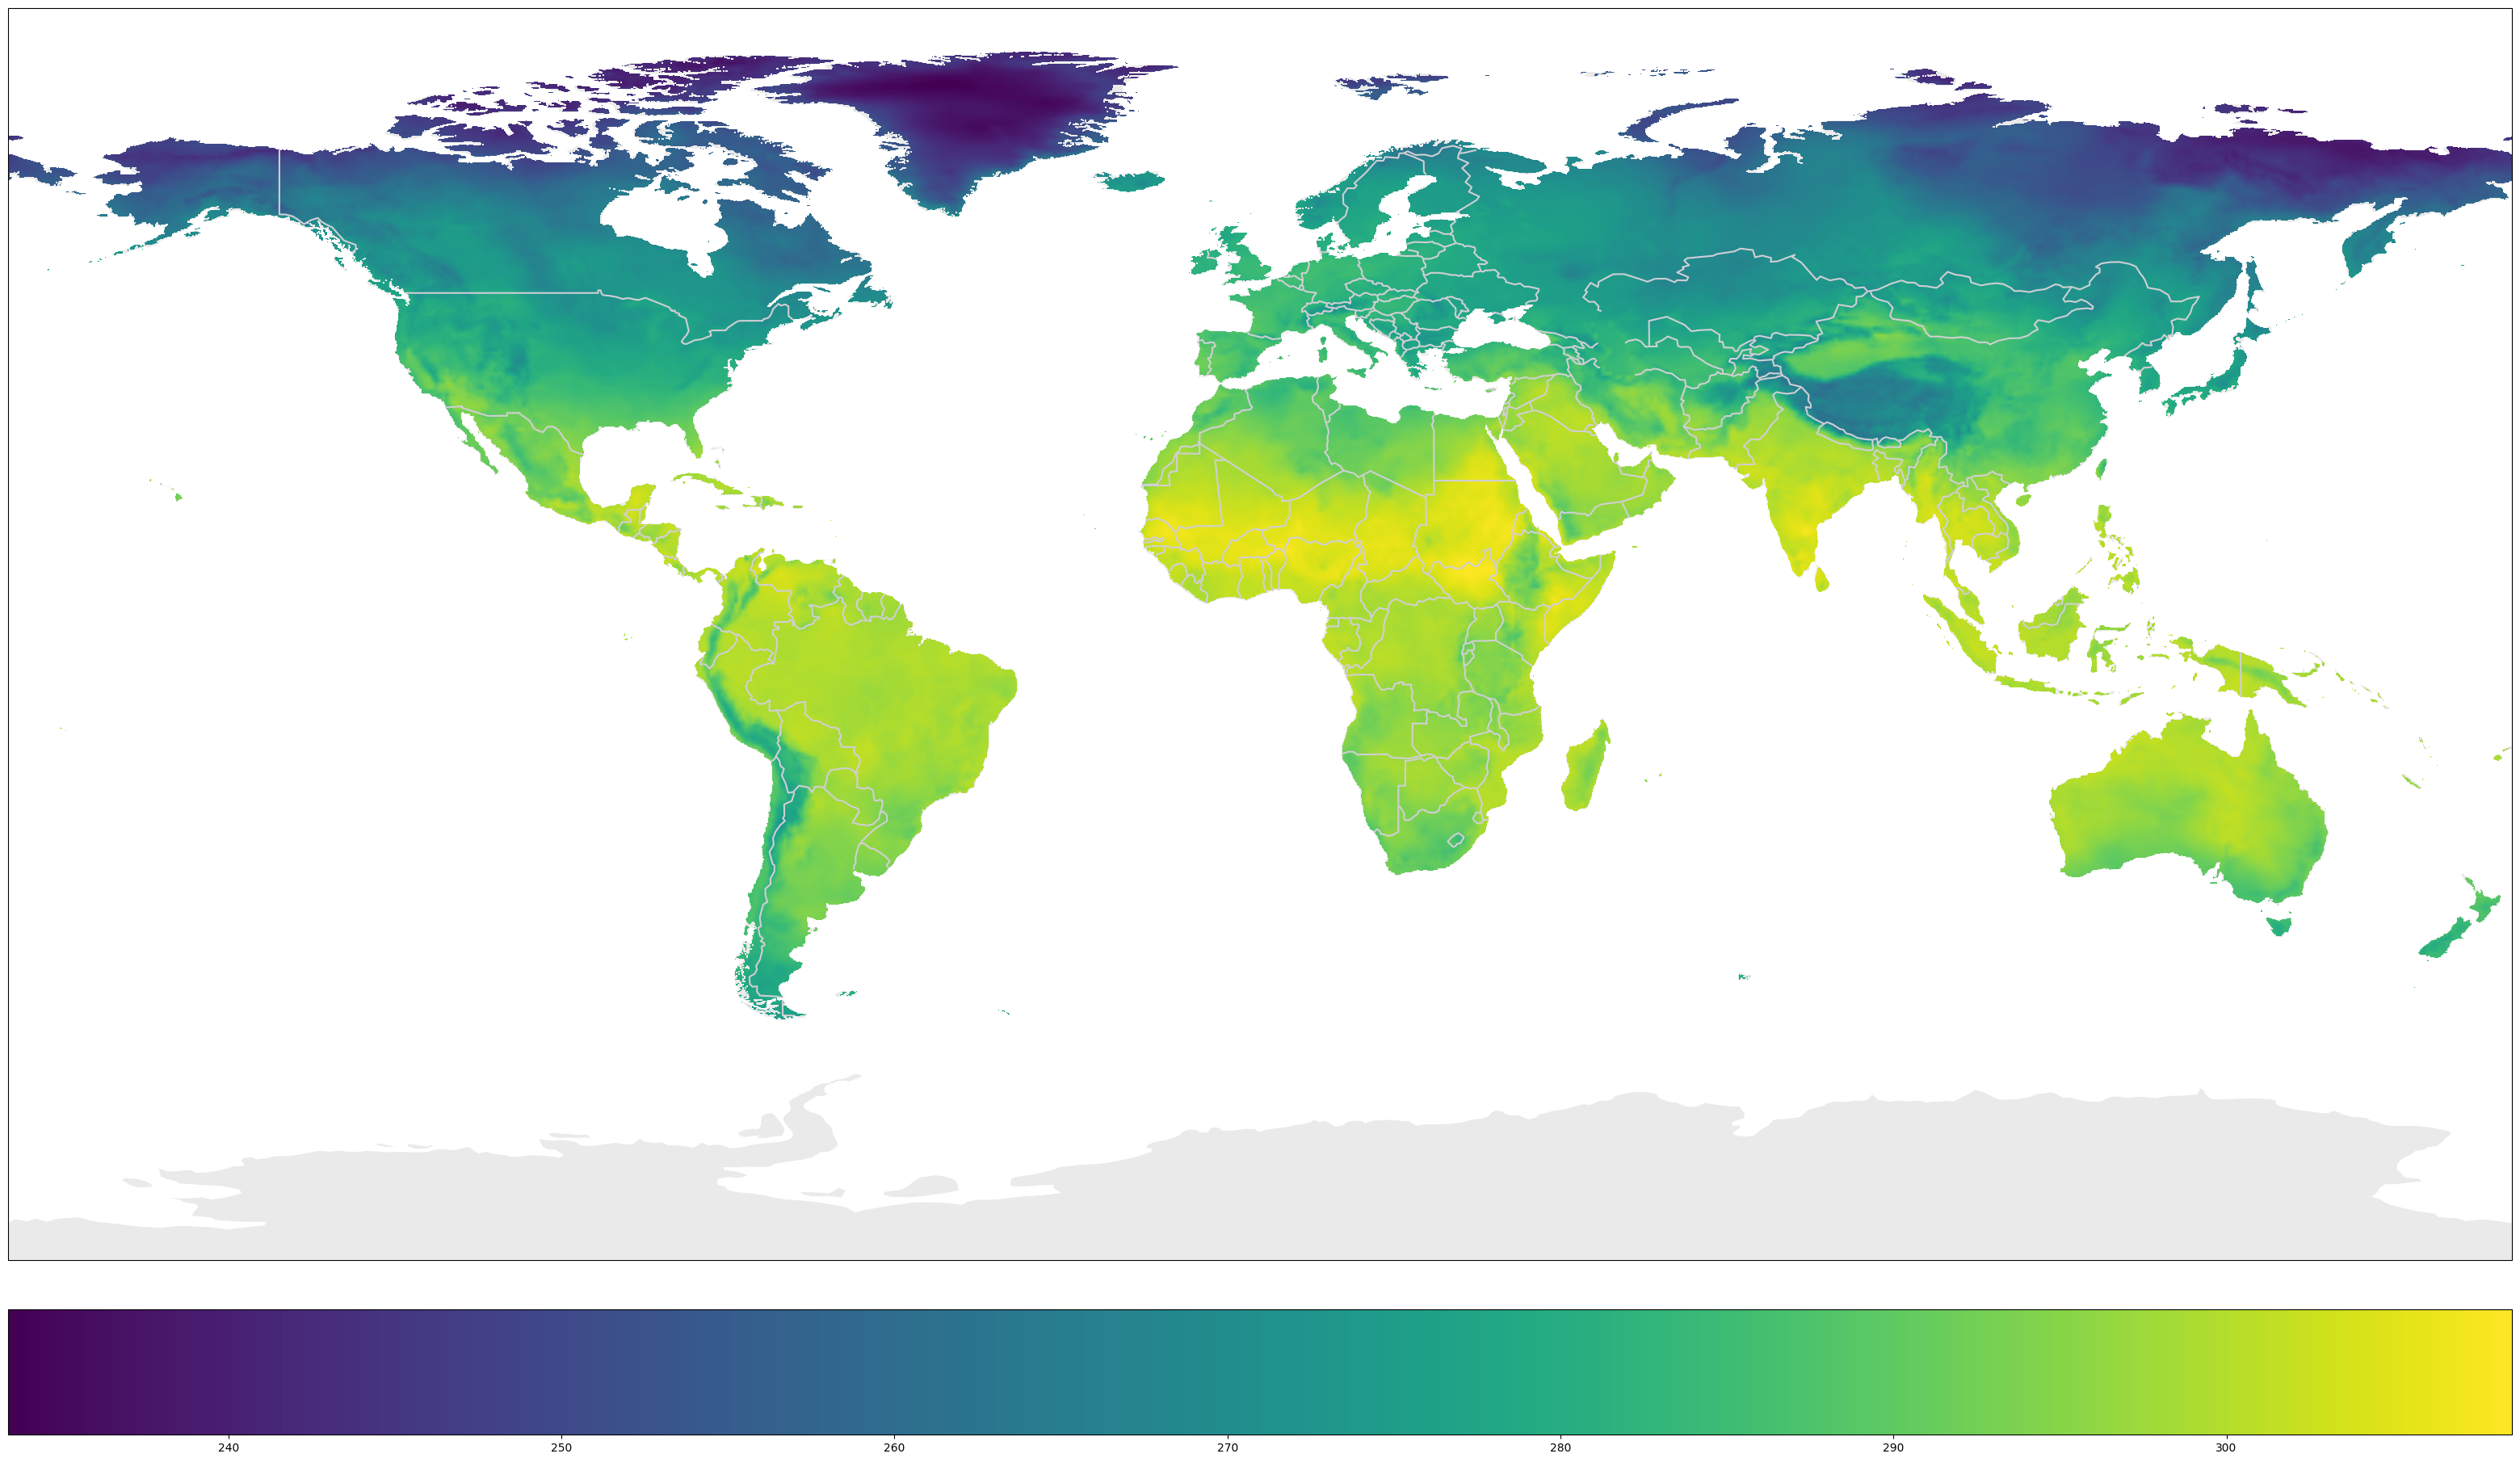

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

img_extent = (-180, 180, -90, 90)
projection = ccrs.PlateCarree(central_longitude=0)
fig, ax = plt.subplots(figsize=(40, 40), subplot_kw={'projection': projection})
imd = ax.imshow(r2dat, 
                extent=img_extent, transform=projection,
)
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea', zorder=-3)
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#ffffff')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1, edgecolor='none', facecolor='#ffffff', zorder=-1)
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4', zorder=5)
ax.gridlines(visible=False)
cbar = fig.colorbar(imd, ax=ax, orientation='horizontal', pad=0.02)
plt.show()